# Differential equations for Hopfield

In [26]:
from __future__ import print_function
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
import seaborn as sns

%matplotlib inline

from hopfield import HopfieldDiff

sns.set(font_scale=2.0)

In [48]:
prng = np.random.RandomState(seed=101)

n_dim = 100
n_store = 10
T = 0.0

t = 2.0
dt = 0.001
tau_m = 0.20
N =  int(t / dt)

time = np.arange(0, t, dt)

nn = HopfieldDiff(n_dim=n_dim, tau_m=tau_m, dt=dt, T=T, prng=prng)
list_of_patterns = nn.generate_random_patterns(n_store)
nn.train(list_of_patterns, normalize=True)

In [49]:
history = np.zeros((N, n_dim))
distance_history = np.zeros((N, 2, n_store))
overlap_history = np.zeros((N, n_store))

for i in range(N):
    nn.update()
    history[i, ...] = nn.s
    distance_history[i, ...] = nn.calculate_state_distance()
    overlap_history[i, ...] = nn.calculate_overlap()


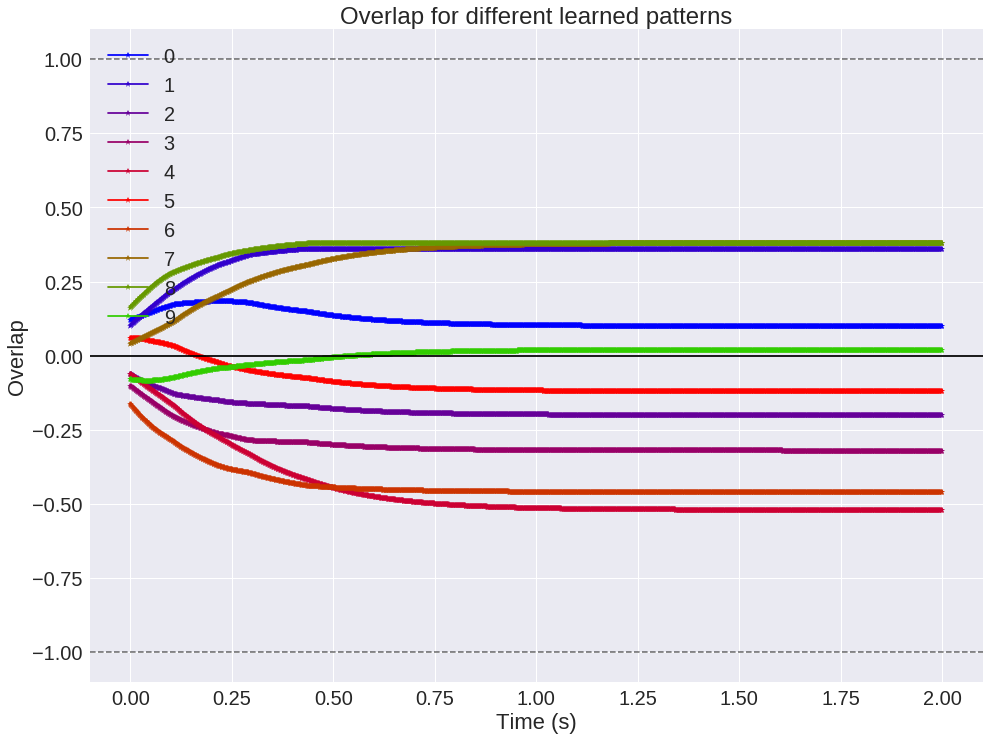

In [50]:
# Let's plot the distance history
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

cmap = cm.terrain
cmap = cm.brg
norm = cm.colors.Normalize(vmin=0, vmax=n_store)


for i in range(n_store):
    ax.plot(time, overlap_history[:, i], '*-', color=cmap(norm(i)), label=str(i))

ax.legend()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Overlap')
ax.set_title('Overlap for different learned patterns')

ax.axhline(0, color='black');
ax.axhline(1.0, ls='--', color='black', alpha=0.5)
ax.axhline(-1.0, ls='--', color='black', alpha=0.5);

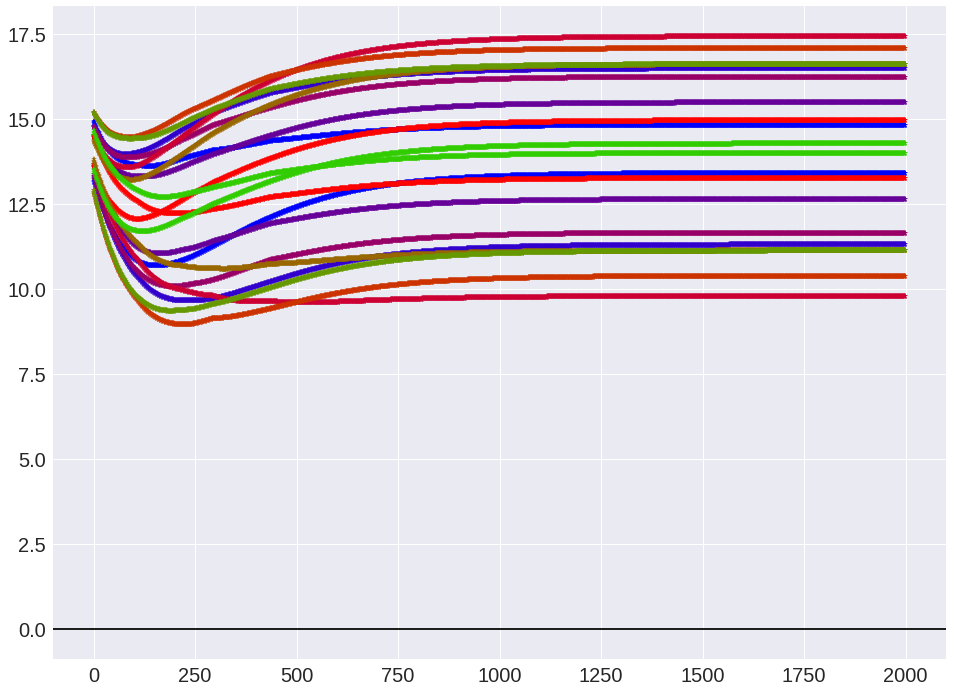

In [47]:
# Let's plot the distance history
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

cmap = cm.terrain
cmap = cm.brg
norm = cm.colors.Normalize(vmin=0, vmax=n_store)


for i in range(n_store):
    ax.plot(distance_history[:, 0, i], '*-', color=cmap(norm(i)))
    ax.plot(distance_history[:, 1, i], '*-', color=cmap(norm(i)))

ax.axhline(0, color='black');